In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine
from ucimlrepo import fetch_ucirepo
import seaborn as sns

In [41]:
def give_me_info(df_name, df):
    print(df_name)
    print(f"Liczba instancji: {df.shape[0]}")
    print(f"Liczba atrybutów: {df.shape[1] - 1}")
    print(f"Liczba klas: {df['target'].nunique()}")
    print(f"Klasy: {df['target'].unique()}")
    print(f"Dystrybucja klas: {df['target'].value_counts(normalize=True)} ")

# Wczytanie zbioru

In [42]:
iris = load_iris()
wine = load_wine()
glass_id = fetch_ucirepo(id=42)
glass = glass_id.data

In [43]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df['target'] = iris_df['target'].apply(lambda x: iris['target_names'][x])

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df['target'] = wine_df['target'].apply(lambda x: wine.target_names[x])

glass_df = pd.DataFrame(glass['original'])
glass_df.drop(columns="Id_number", inplace=True)
glass_df.rename(columns= {'Type_of_glass':'target'}, inplace = True)

# Analiza zbiorów

In [44]:
give_me_info("Iris Dataset", iris_df)

Iris Dataset
Liczba instancji: 150
Liczba atrybutów: 4
Liczba klas: 3
Klasy: ['setosa' 'versicolor' 'virginica']
Dystrybucja klas: target
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64 


In [45]:
give_me_info("Wine Dataset", wine_df)

Wine Dataset
Liczba instancji: 178
Liczba atrybutów: 13
Liczba klas: 3
Klasy: ['class_0' 'class_1' 'class_2']
Dystrybucja klas: target
class_1    0.398876
class_0    0.331461
class_2    0.269663
Name: proportion, dtype: float64 


In [46]:
give_me_info("Glass Dataset", glass_df)

Glass Dataset
Liczba instancji: 214
Liczba atrybutów: 9
Liczba klas: 6
Klasy: [1 2 3 5 6 7]
Dystrybucja klas: target
2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: proportion, dtype: float64 


# Wykres zależności

<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

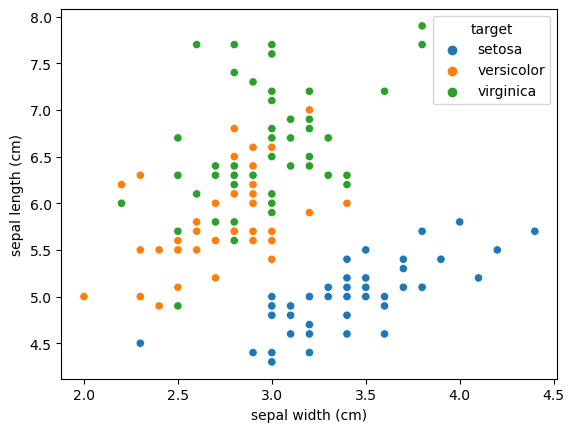

In [47]:
sns.scatterplot(iris_df, x = 'sepal width (cm)', y = 'sepal length (cm)', hue='target')

<Axes: xlabel='alcohol', ylabel='color_intensity'>

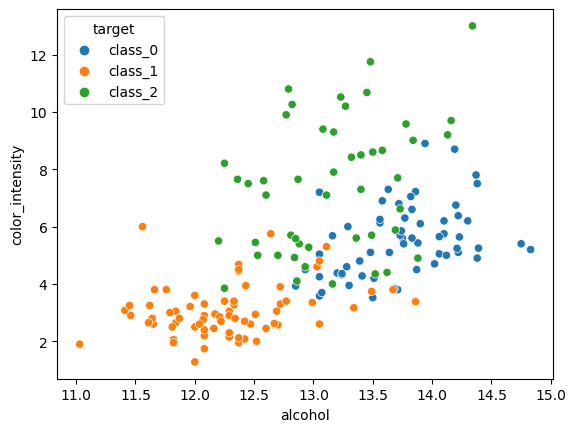

In [48]:
sns.scatterplot(wine_df, x = 'alcohol', y = 'color_intensity', hue='target')

<Axes: xlabel='Na', ylabel='Si'>

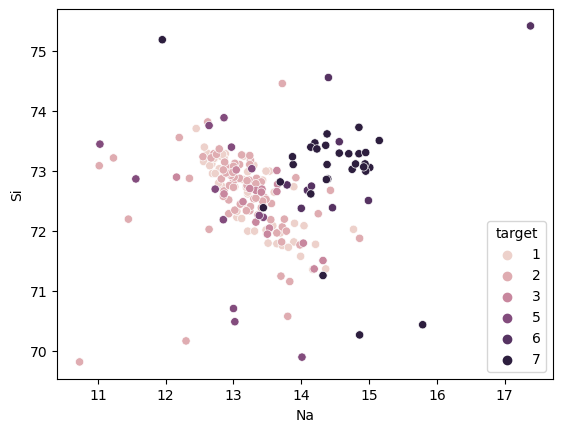

In [49]:
sns.scatterplot(glass_df, x = 'Na', y = 'Si', hue='target')

In [50]:
"""Stworzenie kolumn, aby uzyskac taki sam wykres jak w liście"""
iris_df['width'] = iris_df['sepal width (cm)']
iris_df['length'] = iris_df['sepal length (cm)']

c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

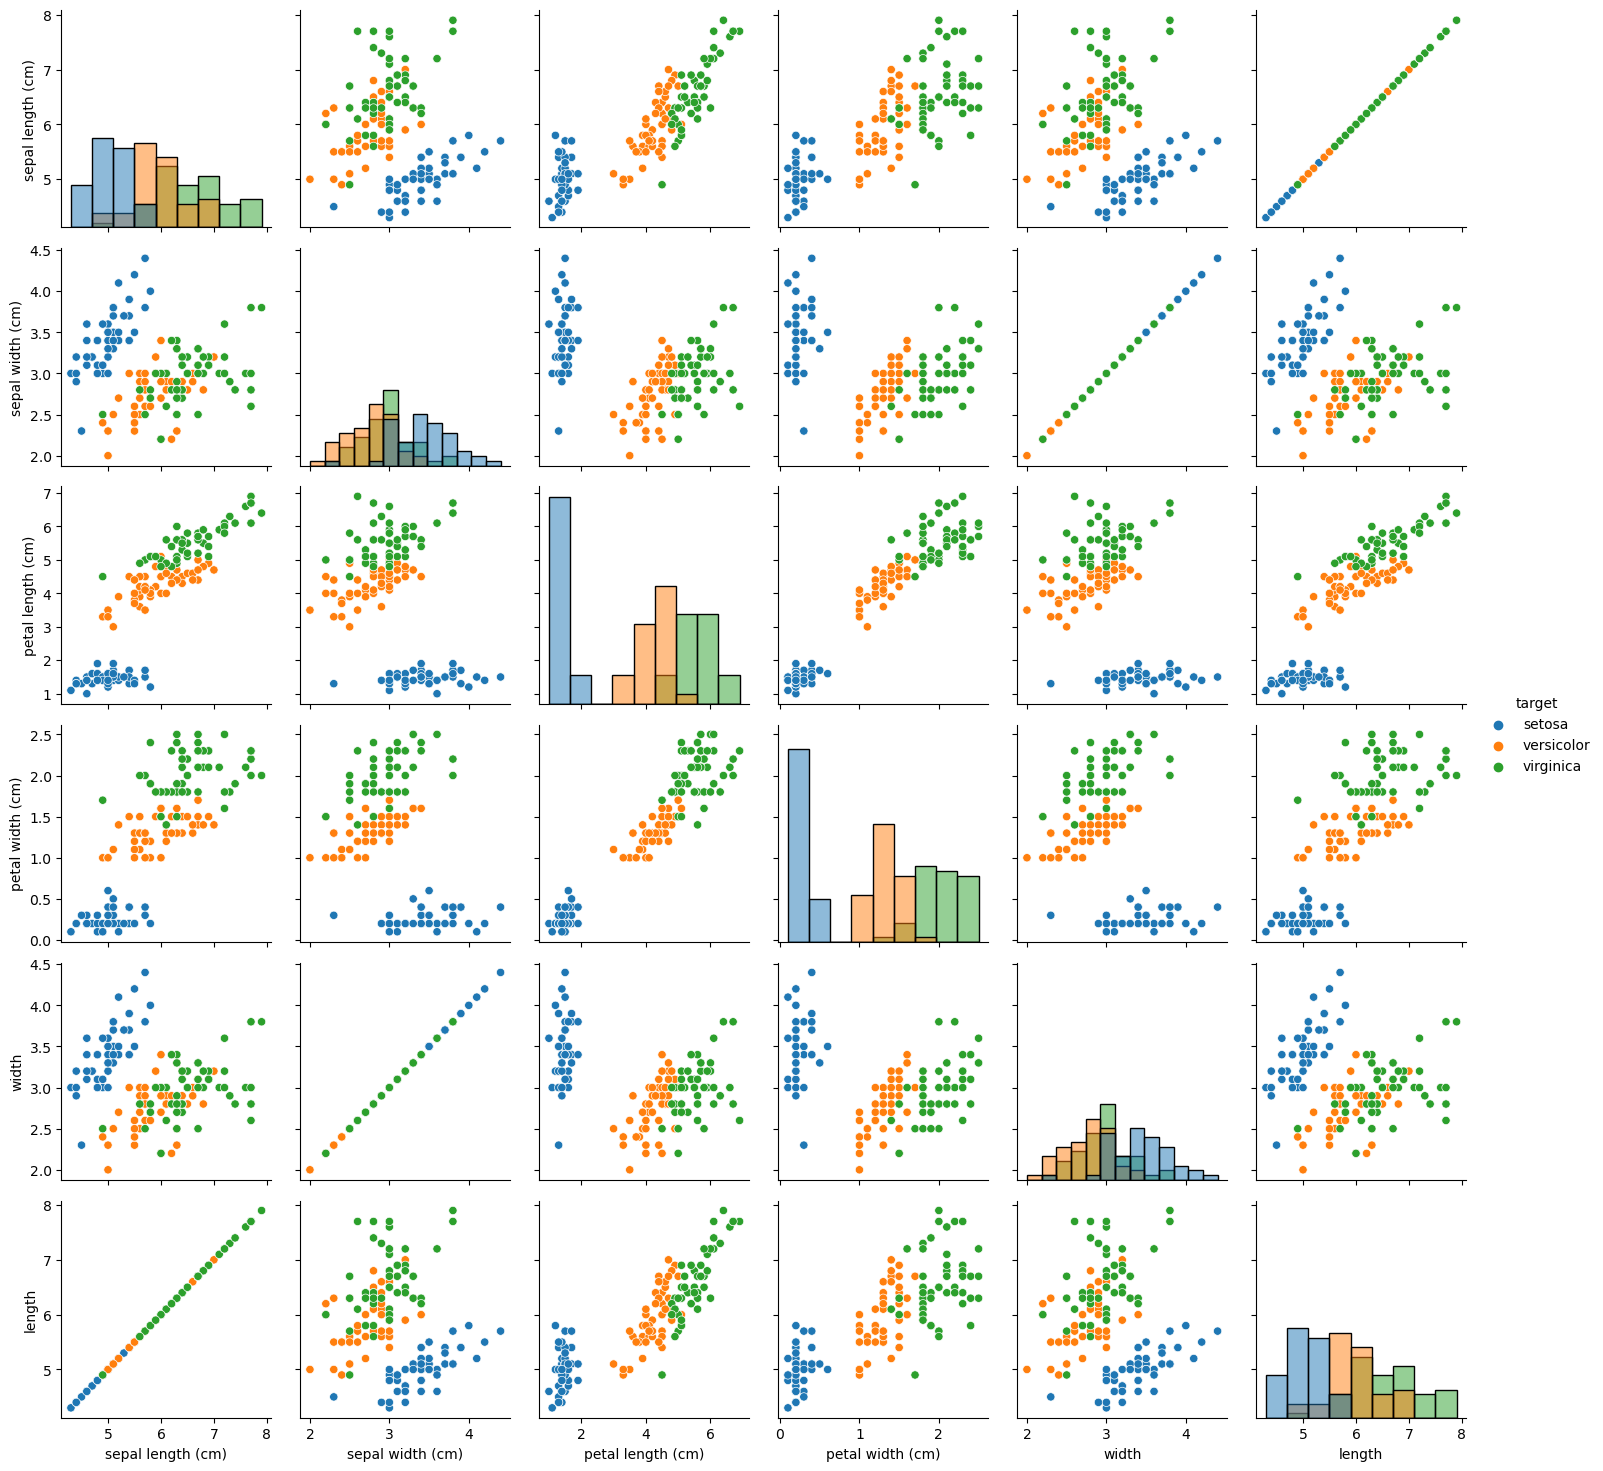

In [51]:
iris_plot = sns.PairGrid(iris_df, hue="target")
iris_plot.map_offdiag(sns.scatterplot)
iris_plot.map_diag(sns.histplot)
iris_plot.add_legend()

c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

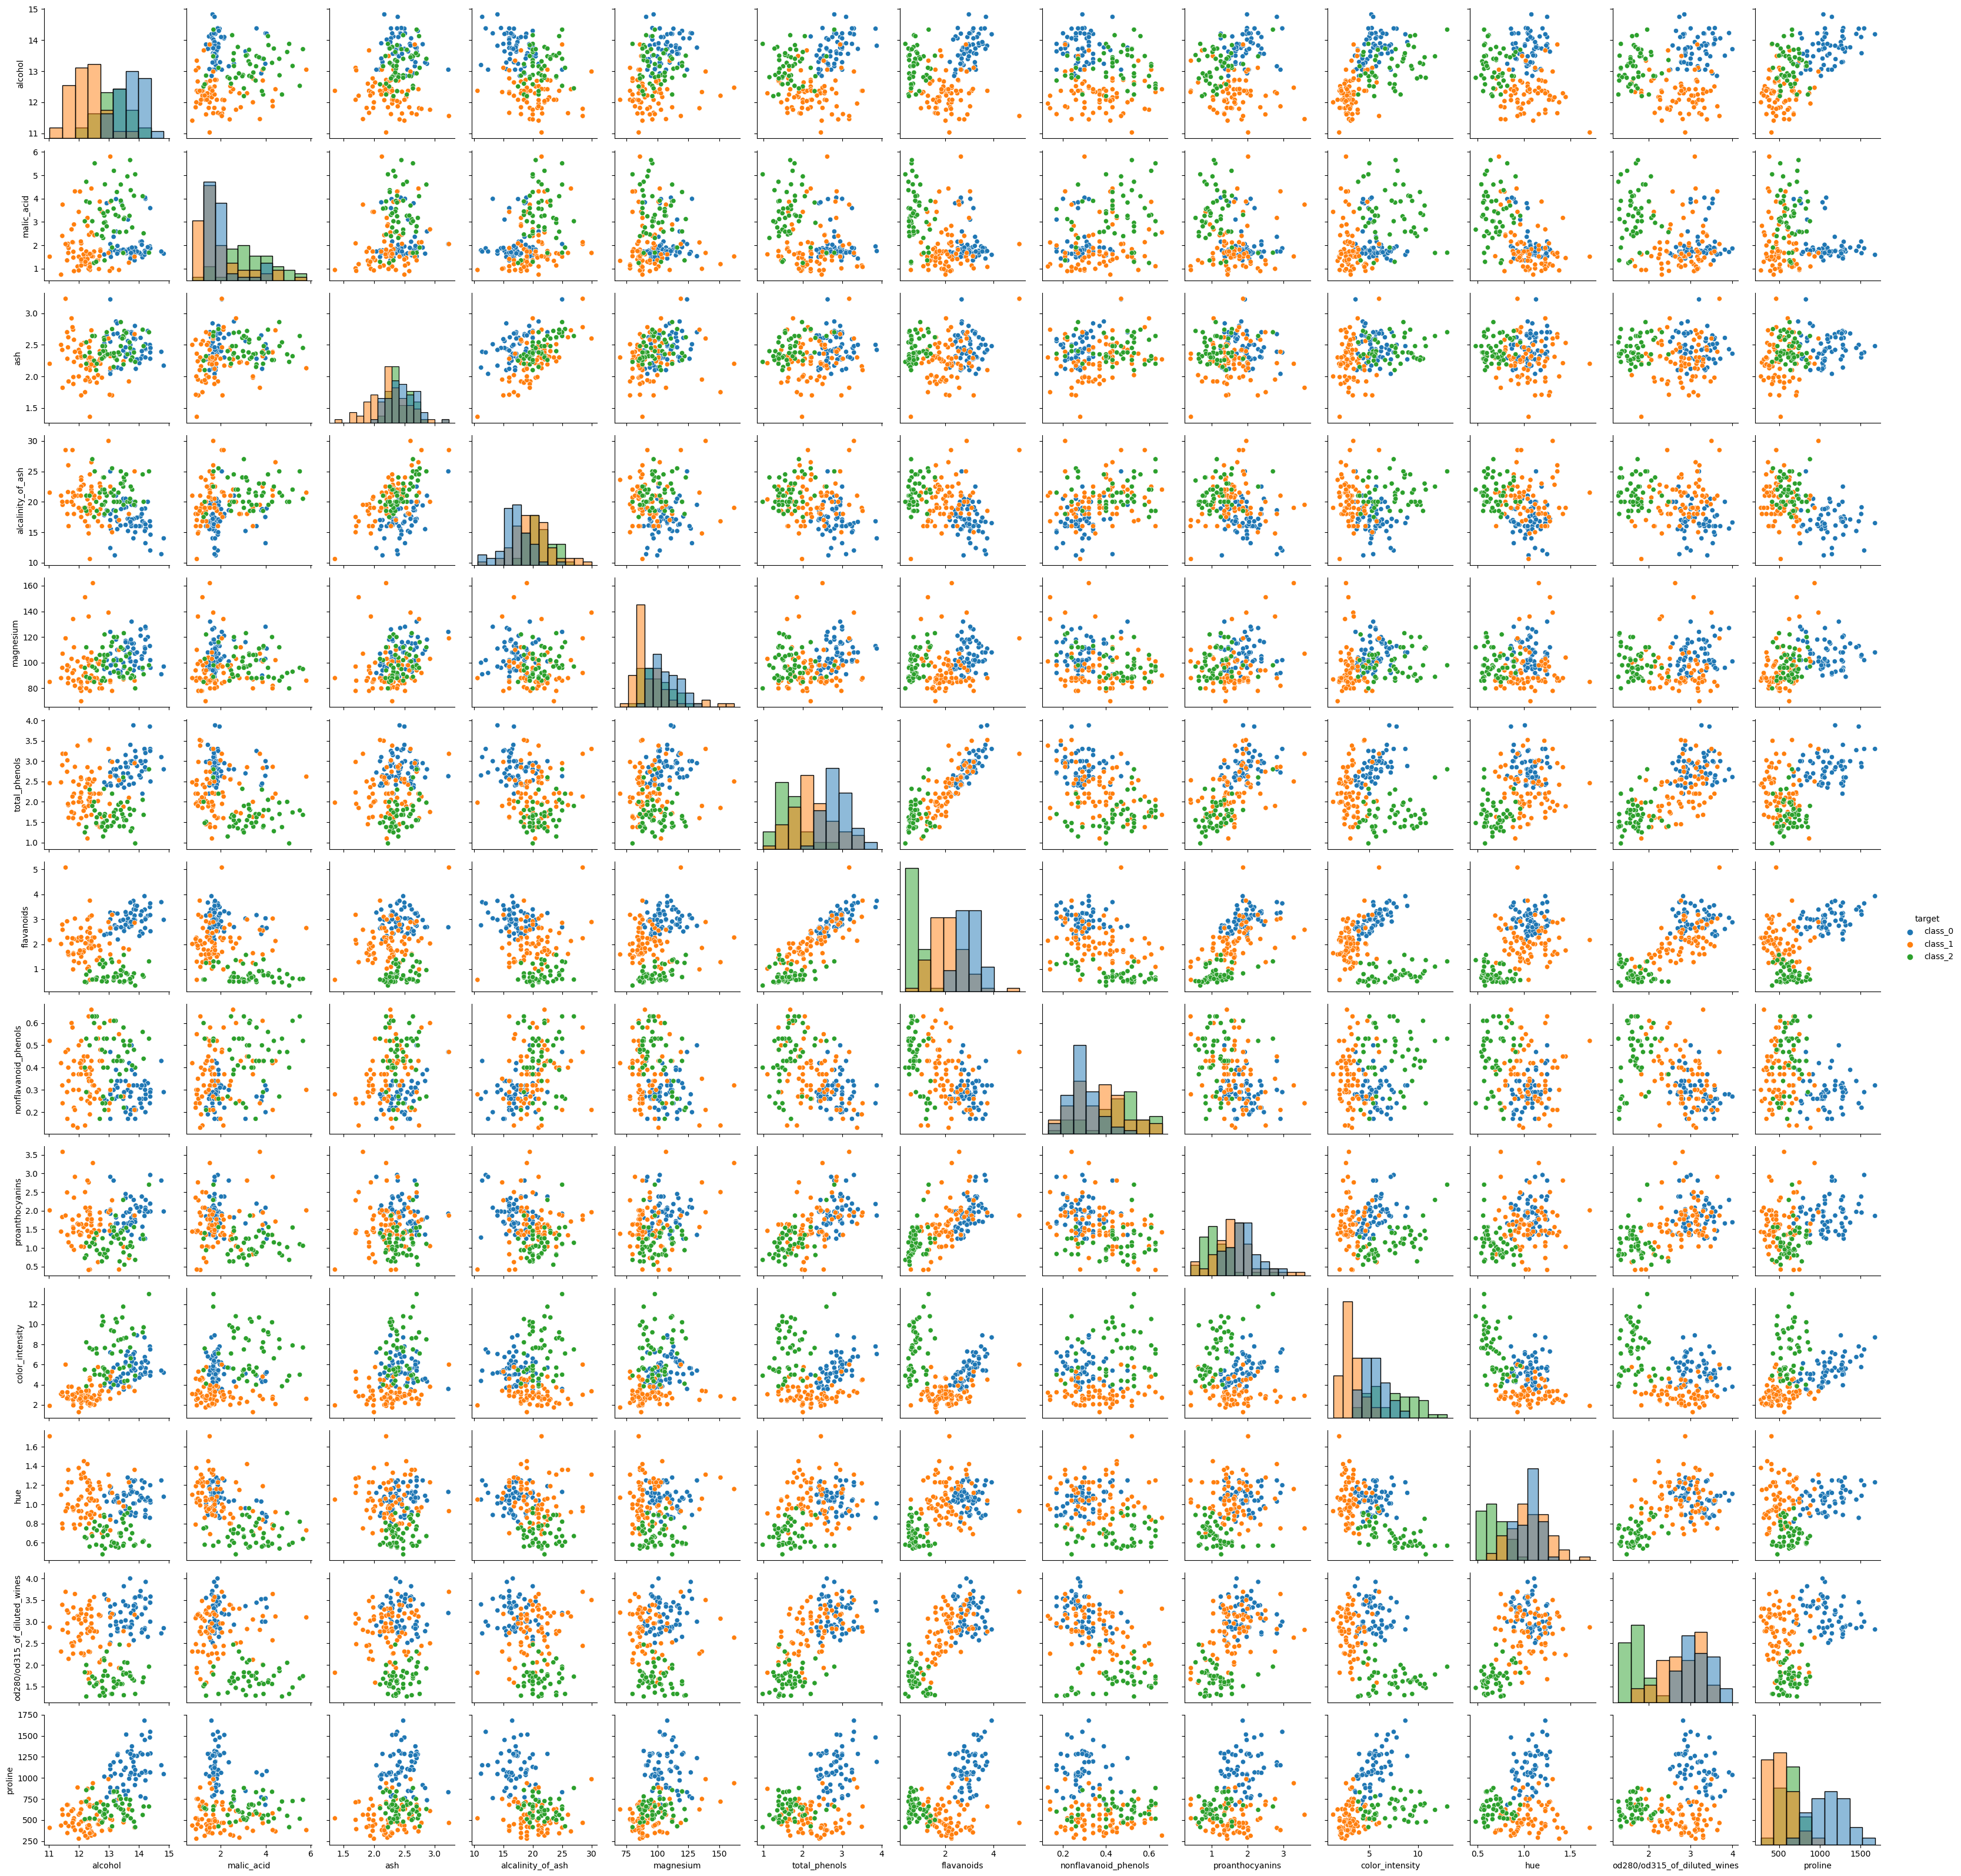

In [52]:
wine_plot = sns.PairGrid(wine_df, hue="target")
wine_plot.map_offdiag(sns.scatterplot)
wine_plot.map_diag(sns.histplot)
wine_plot.add_legend()

c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

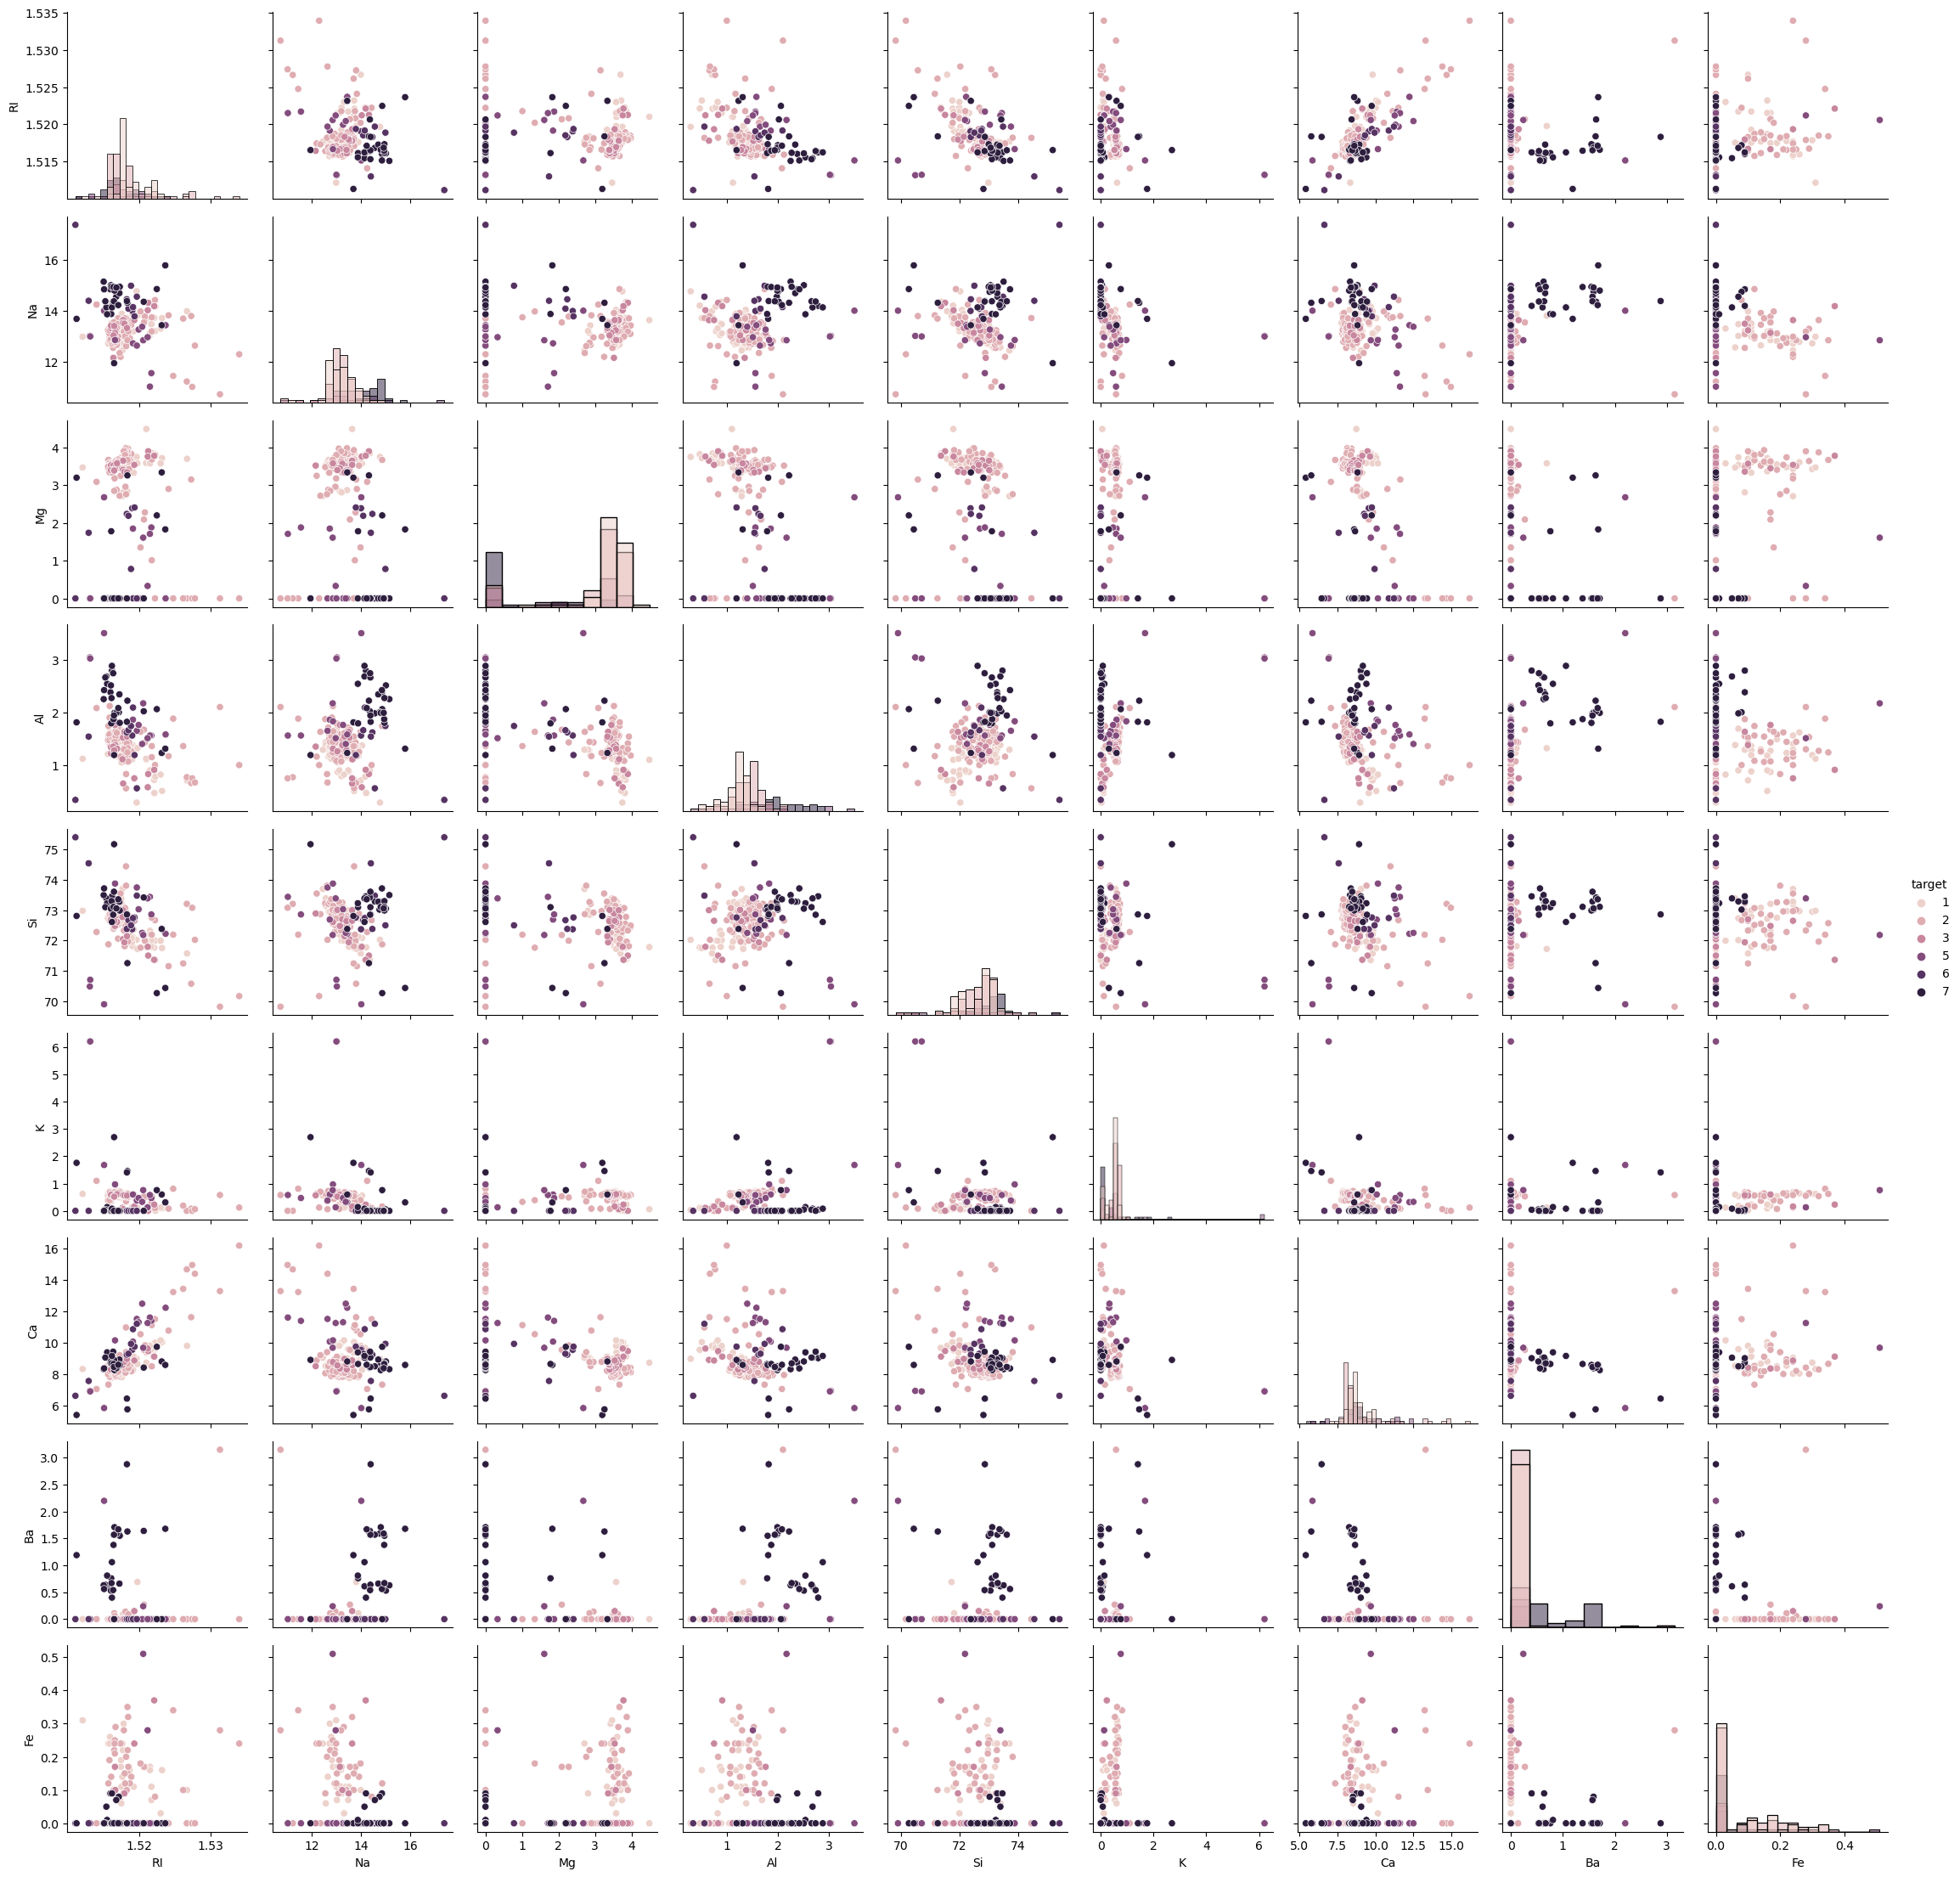

In [53]:
glass_plot = sns.PairGrid(glass_df, hue="target")
glass_plot.map_offdiag(sns.scatterplot)
glass_plot.map_diag(sns.histplot)
glass_plot.add_legend()

# PCA

In [54]:
def make_pca(data = iris_df):
    scaler = StandardScaler()
    df = data.drop(columns = 'target').copy()
    scaler.fit(df)
    scaled_data = scaler.transform(df)
    n = df.shape[1]
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    x = pca.transform(scaled_data)
    names = [f"PC{i+1}" for i in range(n)]
    sns.barplot(x = list(range(n)), y = np.cumsum(pca.explained_variance_ratio_))
    plt.xticks(ticks=range(n),labels = names)
    plt.axhline(0.95)
    df_new = pd.DataFrame(x, columns=names)
    df_new['target'] = data['target']
    display(df_new)
    return df_new

In [55]:
def make_3d(pca_df):    
    fig3 = plt.figure(figsize=(10, 8))
    ax2 = fig3.add_subplot(111, projection="3d")
    for category in pca_df["target"].unique():
        subset = pca_df[pca_df["target"] == category]
        ax2.scatter(
            subset["PC1"],
            subset["PC2"],
            subset["PC3"],
            label=f"class {category}",
            alpha=0.5,
        )
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.set_zlabel("PC3")

c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


PC1       PC2       PC3       PC4           PC5           PC6  \
0   -2.608654  0.616720 -0.199513 -0.023788  3.467340e-16 -6.017029e-18   
1   -2.247061 -0.998737 -0.342461 -0.101859  5.615906e-17 -1.499424e-16   
2   -2.725139 -0.555818 -0.003541 -0.031111  1.569096e-16 -1.757547e-16   
3   -2.662116 -0.916856  0.066080  0.064275  1.237294e-16 -9.700669e-17   
4   -2.833658  0.839447 -0.021509  0.034739  4.218286e-16 -4.538212e-17   
..        ...       ...       ...       ...           ...           ...   
145  2.091518  0.585329  0.288508 -0.400378 -4.018921e-17 -1.447256e-17   
146  1.929553 -1.216172 -0.037580 -0.222829 -2.203995e-16 -9.869473e-17   
147  1.686424  0.413752  0.230147 -0.123880 -6.441095e-17 -7.288245e-17   
148  1.138583  1.409611  1.141425 -0.043012  1.374550e-16  8.398478e-17   
149  0.879342 -0.037718  0.672201  0.157188 -1.421914e-17 -8.061819e-18   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 7 columns]

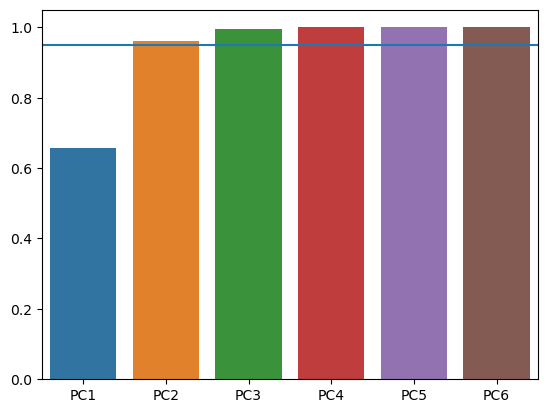

In [56]:
iris_pca = make_pca(iris_df)

<Axes: xlabel='PC1', ylabel='PC2'>

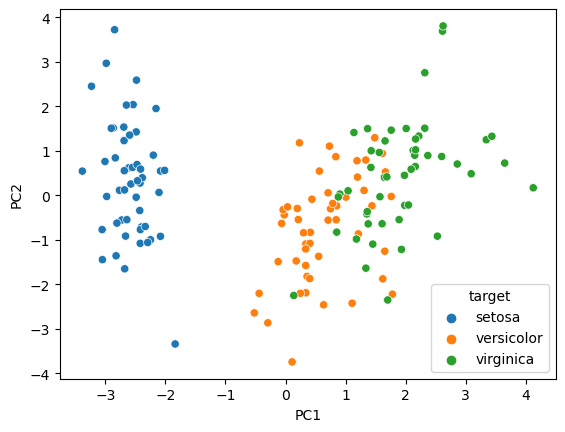

In [66]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = iris_pca, hue = 'target')

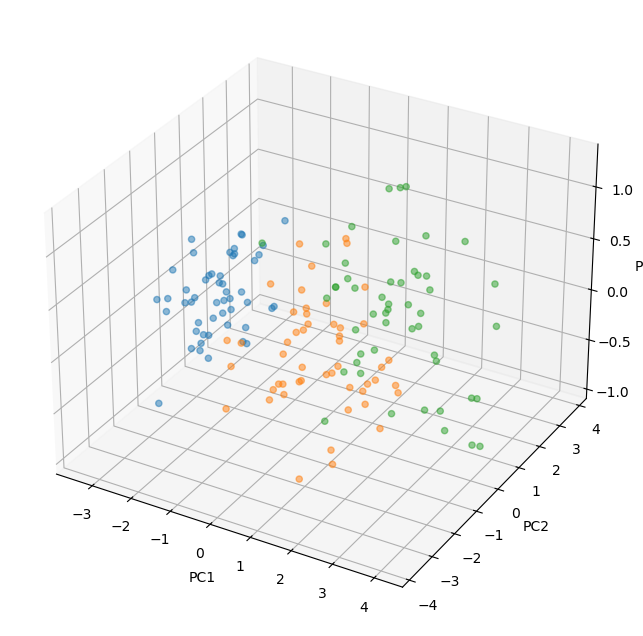

In [58]:
make_3d(iris_pca)

c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

          PC8       PC9      PC10      PC11      PC12      PC13   target  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  class_0  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  class_0  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  class_0  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  class_0  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  class_0  
..        ...       ...       ...       ...       ...       ...      ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  class_2  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  class_2  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  class_2  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  class_2  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  class_2  

[178 rows x 14 columns]

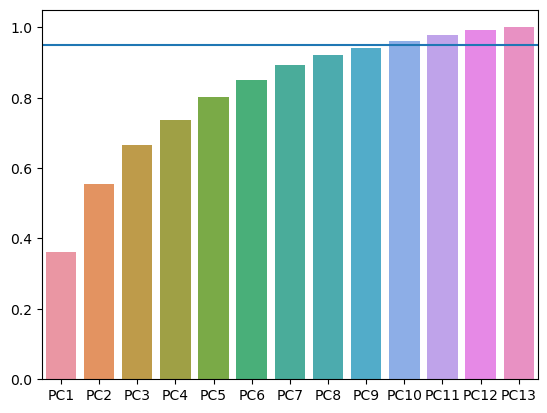

In [59]:
wine_pca = make_pca(wine_df)

<Axes: xlabel='PC1', ylabel='PC2'>

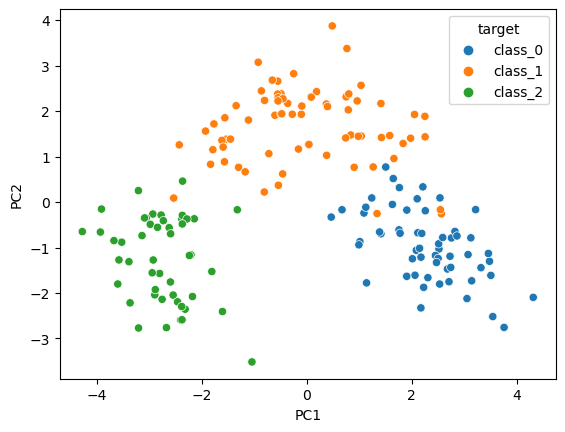

In [60]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = wine_pca, hue = 'target')

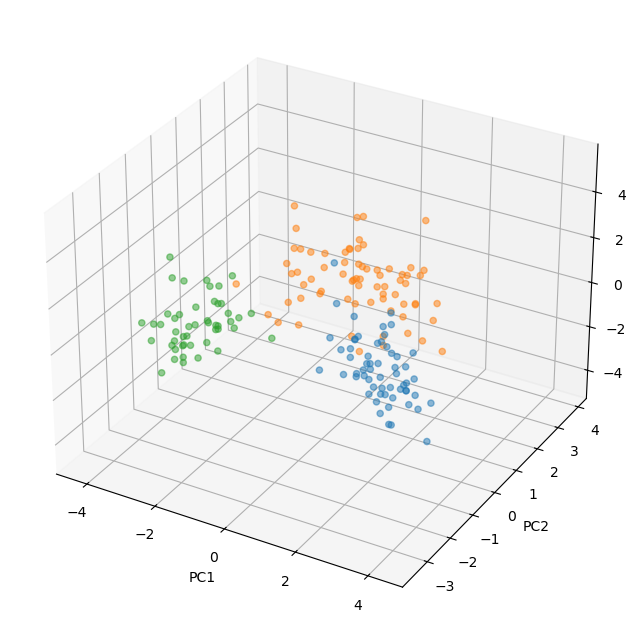

In [61]:
make_3d(wine_pca)

c:\Users\krzys\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.151140 -0.529488 -0.372096  1.728901 -0.251936  0.340210 -0.395600   
1   -0.574137 -0.759788 -0.556708  0.760232 -0.257071 -0.115960 -0.024158   
2   -0.940160 -0.929836 -0.554907  0.206254 -0.237506  0.126630 -0.367518   
3   -0.142083 -0.961677 -0.117125  0.415724 -0.476299  0.285805 -0.052497   
4   -0.351092 -1.091249 -0.485079  0.069102 -0.432090  0.298032  0.158570   
..        ...       ...       ...       ...       ...       ...       ...   
209 -2.383835  3.061677  0.090445 -0.376611  0.103227  0.231162 -1.320186   
210 -2.397652  3.108236 -1.117502  0.288454  0.624723  0.618056  0.582361   
211 -1.680246  3.284823 -0.930349 -0.171014  0.451687  1.247320  0.674122   
212 -2.369748  2.756873 -1.234701 -0.525285  0.515008  1.003352  0.678899   
213 -2.262649  3.028592 -0.890845 -0.414491  0.505474  1.213617  0.462461   

          PC8       PC9  target  
0   -0.197160  0.016346       1  
1   -0.284214 -0.010790       1  
2   -0.095941  0.021640       1  
3   -0.002959  0.092035       1  
4   -0.191316  0.002315       1  
..        ...       ...     ...  
209  0.189401 -0.028657       7  
210  0.131651 -0.013663       7  
211 -0.891710  0.046284       7  
212  0.074460 -0.027301       7  
213  0.063315 -0.019450       7  

[214 rows x 10 columns]

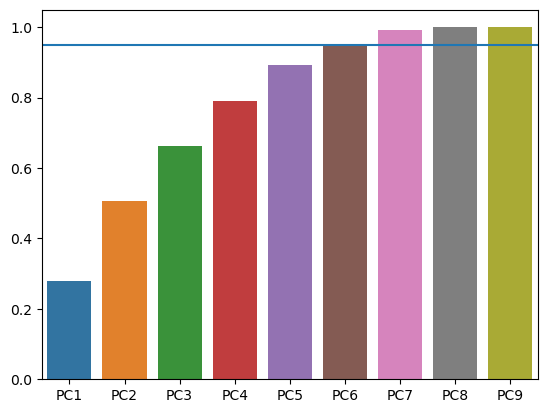

In [62]:
glass_pca = make_pca(glass_df)

<Axes: xlabel='PC1', ylabel='PC2'>

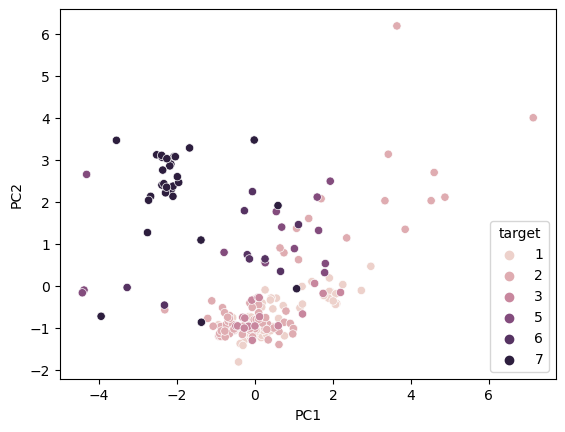

In [63]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = glass_pca, hue = 'target')

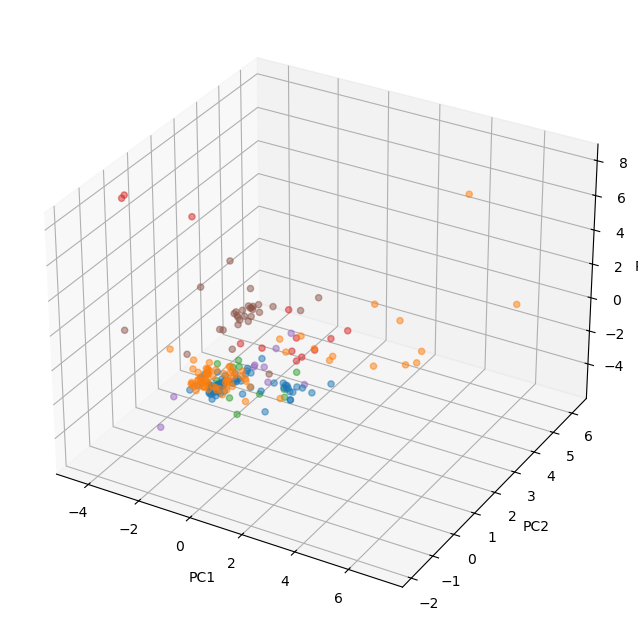

In [64]:
make_3d(glass_pca)